<h1 style="margin-bottom:0"><center>DI 504: Fundementals of Deep Learning</center></h1>
<h2 style="margin-top:0"><center>Practical Assignment</center></h2>
<h5 style="margin-top:0;color:blue"><center><b>Mehmet Ali Erkan - First Notebook</b></center></h5>


## Problem definition

This assignment will focus on the [Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset created by Han Xiao et al. It borrows its name and concept from the famous MNIST dataset. MNIST is a collection of hand drawn digit images and their corresponding labels.

Fashion MNIST takes this idea further with arguably more ambiguous objects, articles of clothing. It is still an idealized dataset, and learnings from this task may not translate to more advanced computer vision tasks.

Below is a table with each class label, their meaning, and example images. (Each three rows correspond examples from one class.)

<style>
td, th {
   border: none!important;
}
</style>


<table>

<td>

| **Label** | **Description** |
|---|---|
| 0 | T-shirt/top |
| | |
| | |
| | |
| | |
| | |
| 1 | Trouser |
| | |
| | |
| | |
| | |
| | |
| 2 | Pullover |
| | |
| | |
| | |
| | |
| | |
| 3 | Dress |
| | |
| | |
| | |
| | |
| | |
| 4 | Coat |
| | |
| | |
| | |
| | |
| | |
| 5 | Sandal |
| | |
| | |
| | |
| | |
| | |
| 6 | Shirt |
| | |
| | |
| | |
| | |
| | |
| 7 | Sneaker |
| | |
| | |
| | |
| | |
| | |
| 8 | Bag |
| | |
| | |
| | |
| | |
| | |
| 9 | Ankle boot |

</td>
<td>

<br>

![](https://github.com/zalandoresearch/fashion-mnist/blob/master/doc/img/fashion-mnist-sprite.png?raw=true)

</td>

</table>

Each image is grayscale with 8-bit precision (256 gray levels), and of size 28x28 pixels. Each class is represented by 7000 images for a total of 70000 samples, 10000 of which were reserved for a test set.

# Part 1: Preprocessing (10 pts)

The Fashion MNIST dataset can be downloaded and processed with the help of torchvision. If it is not available in your environment, you can install it with the given command below.

Import the relevant libraries as well as any additional ones of possible use.

In [ ]:
# !pip install torchvision
# !pip install tqdm

In [ ]:
import torch
import torchvision
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm
import os

device = 'cuda' if torch.cuda.is_available() else 'cpu'

## 1) Validation set

Reserve a further 10000 samples from the training set and set it aside as a validation set. Finally, print the sizes of the sets available: training, validation and test.

In [ ]:
path = os.getcwd()

transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(0, 1)
])

fmnist_train = torchvision.datasets.FashionMNIST(path, train=True, transform=transform, download=True)
fmnist_test = torchvision.datasets.FashionMNIST(path, train=False, transform=transform, download=True)

###############
from torch.utils.data import random_split
#split into train and test set
train_size = 50000
val_size = 10000

fmnist_train, fmnist_val = random_split(fmnist_train, [train_size, val_size])

# print the dimension of dataset
print(f"New training set size: \t{len(fmnist_train)}")
print(f"Validation set size: \t{len(fmnist_val)}")
print(f"Test set size: \t\t{len(fmnist_test)}")

###############

100%|██████████| 26.4M/26.4M [00:02<00:00, 11.1MB/s]


Extracting /content/FashionMNIST/raw/train-images-idx3-ubyte.gz to /content/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 169kB/s]


Extracting /content/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /content/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.26MB/s]


Extracting /content/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /content/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 7.77MB/s]

Extracting /content/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /content/FashionMNIST/raw

New training set size: 	50000
Validation set size: 	10000
Test set size: 		10000


## 2) Inspect the data

Using the iterators for the three splits, construct dataloaders with batch size of 32. Print the contents of a single batch as well as its shape. Display one example from the batch with the class label.

In [ ]:
from torch.utils.data import DataLoader
batch_size = 32
train_dataloader = DataLoader(fmnist_train, batch_size=batch_size, shuffle=True)
valid_dataloader = DataLoader(fmnist_val, batch_size=batch_size, shuffle=False)
test_dataloader = DataLoader(fmnist_test, batch_size=batch_size, shuffle=False)

labs = {
    0 : 'T-shirt/top',
    1 : 'Trouser',
    2 : 'Pullover',
    3 : 'Dress',
    4 : 'Coat',
    5 : 'Sandal',
    6 : 'Shirt',
    7 : 'Sneaker',
    8 : 'Bag',
    9 : 'Ankle boot'
}
# #take a batch from the train set
dataiter = iter(train_dataloader)
images, labels = next(dataiter)

# print the shape and data
print(f"Shape of the inputs from the dataloader: {images.shape}")
print("And the data looks like so:")
print(images)

Shape of the inputs from the dataloader: torch.Size([32, 1, 28, 28])
And the data looks like so:
tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
       

Label index: 4


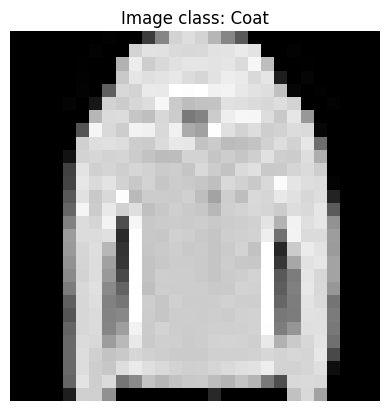

In [ ]:
# take image from a batch
dataiter = iter(train_dataloader)
images, labels = next(dataiter)

# visualization function for image
def show_sample(img, label):
    img = img.squeeze()  # 28z28
    plt.imshow(img, cmap="gray")
    plt.title(f"Image class: {labs[label.item()]}")
    plt.axis("off")
    plt.show()

print(f"Label index: {labels[0].item()}")  #index
show_sample(images[0], labels[0])

# Part 2: Fully Connected Network (25 pts)

## 1) Model Definition

Construct a fully connected network with an input layer, a single hidden layer, and an output layer. Considering the fact that our inputs will be 2D, change their shape to fit this model with `torch.Tensor.view()`. You should output 10 values for each class. Initialize the model with the following parameters:

* Hidden layer sizes: 500

* Non-linearity: ReLU

With the untrained model generate predictions for a single batch and confirm that the output is in the correct shape. (Batch size x number of classes)

In [ ]:
class ThreeLayerNetwork(torch.nn.Module):
    def __init__(self, hidden_size):
        super().__init__()
        # define layer
        self.layer1 = torch.nn.Linear(28 * 28, hidden_size)
        self.layer2 = torch.nn.Linear(hidden_size, 10)

    def forward(self, x):
        # view
        x = x.view(x.size(0), -1)  # Batch size x (28x28)
        x = F.relu(self.layer1(x))  #first layer and ReLU activation function
        x = self.layer2(x)  #
        return x

# model
three_layer_net = ThreeLayerNetwork(hidden_size=500).to(device)

# Dummy data and test
dummy_input = torch.randn(16, 1, 28, 28).to(device)  # Dummy input şekli: [Batch size, Channels, Height, Width]
dummy_output = three_layer_net(dummy_input)

# Shape
print(f"Dummy input shape: {dummy_input.shape}")
print(f"Dummy output shape: {dummy_output.shape}")


Dummy input shape: torch.Size([16, 1, 28, 28])
Dummy output shape: torch.Size([16, 10])


## 2) Training loop part 1

We will simplify training and validation checks by writing functions. These functions should take all the necessary objects, like the dataloader, model, loss and optimizer, and run the necessary steps for a) training and b) tracking performance.

Since our requirements for testing and training are different, we will calculate accuracy in training loop by continually summing true positives and only at the end return the accuracy.

For the validation function we won't calculate anything, and instead pass the predictions and actual labels given the dataloader (validation or test), and we can use any function we want for evaluation.

In [ ]:
def train(dataloader, model, loss, optimizer):
    losses = []
    true_positive = 0
    model.train()
    for images, labels in tqdm.tqdm(dataloader):
        images, labels = images.to(device), labels.to(device)

        class_scores = model(images)

        # calculate loss function
        train_loss = loss(class_scores, labels)

        # Gradients to zero
        optimizer.zero_grad()

        # backward and optimization steps
        train_loss.backward()
        optimizer.step()

        losses.append(train_loss.item())

        predicted_class = torch.argmax(class_scores, dim=1)

        true_positive_batch = torch.sum(predicted_class == labels)
        true_positive += true_positive_batch.item()

    accuracy = true_positive / len(dataloader.dataset)

    return losses, accuracy

def validate(dataloader, model, loss):
    losses = []
    preds = []
    actuals = []
    model.eval()  # convert model into evaulation part
    with torch.no_grad():  # do not calculate gradiemt
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)

            # take class score from the model
            class_scores = model(images)

            # calculate loss function
            val_loss = loss(class_scores, labels)
            losses.append(val_loss.item())

            # detect the predicted limit
            predicted_class = torch.argmax(class_scores, dim=1)

            # save the predicted and actual labels
            preds.extend(predicted_class.tolist())
            actuals.extend(labels.tolist())

    return losses, preds, actuals


## 2) Training loop part 2:

Define the Adam optimizer to update the parameters of our model, with learning rate 0.001. Also define CrossEntropyLoss as the loss function.

If the train function is ran once, this will correspond to one epoch. Define a loop to train for 5 epochs, and record loss and accuracy values for training and validation sets.

In [ ]:
# Define Adam optimizer and CrossEntropyLoss
optimizer = torch.optim.Adam(three_layer_net.parameters(), lr=0.001)
loss_function = torch.nn.CrossEntropyLoss()

epoch_nr = 5

train_loss_list = []
val_loss_list = []
train_acc_list = []
val_acc_list = []

# Accuracy function
def accuracy(predictions, labels):
    correct = sum(p == l for p, l in zip(predictions, labels))
    return correct / len(labels)

# Training
for i in range(epoch_nr):

    tr_l, tr_acc = train(train_dataloader, three_layer_net, loss_function, optimizer)

    # Accuracy
    vl_l, pred, act = validate(valid_dataloader, three_layer_net, loss_function)
    val_acc = accuracy(pred, act)

    # save the predicted and actual labels
    train_loss_list.extend(tr_l)
    val_loss_list.extend(vl_l)

    train_acc_list.append(tr_acc)
    val_acc_list.append(val_acc)


    print(
        f"End of epoch {i+1} : Train loss: {np.mean(tr_l):.3f} \t Valid loss: {np.mean(vl_l):.3f} \t "
        f"Train Acc: {tr_acc*100:.2f}% \t Valid Acc: {val_acc*100:.2f}%"
    )



100%|██████████| 1563/1563 [00:13<00:00, 117.98it/s]


End of epoch 1 : Train loss: 0.497 	 Valid loss: 0.381 	 Train Acc: 82.18% 	 Valid Acc: 86.14%


100%|██████████| 1563/1563 [00:12<00:00, 124.23it/s]


End of epoch 2 : Train loss: 0.370 	 Valid loss: 0.355 	 Train Acc: 86.52% 	 Valid Acc: 87.15%


100%|██████████| 1563/1563 [00:12<00:00, 123.27it/s]


End of epoch 3 : Train loss: 0.334 	 Valid loss: 0.352 	 Train Acc: 87.67% 	 Valid Acc: 87.18%


100%|██████████| 1563/1563 [00:12<00:00, 122.04it/s]


End of epoch 4 : Train loss: 0.304 	 Valid loss: 0.345 	 Train Acc: 88.66% 	 Valid Acc: 87.60%


100%|██████████| 1563/1563 [00:12<00:00, 122.85it/s]


End of epoch 5 : Train loss: 0.289 	 Valid loss: 0.325 	 Train Acc: 89.15% 	 Valid Acc: 87.95%


## 3) Performance evaluation

After training is done, plot loss curves with the help of the function given below. Also plot the accuracy values for each split, for each epoch.

Notice how loss values were not averaged over epochs, and instead the validation loss values are repeated to appear on the same time scale as the training loss. This is an approximation, as the validation loss is calculated only after training.

**Determine if and when the validation loss starts to deviate from the training loss curve.**

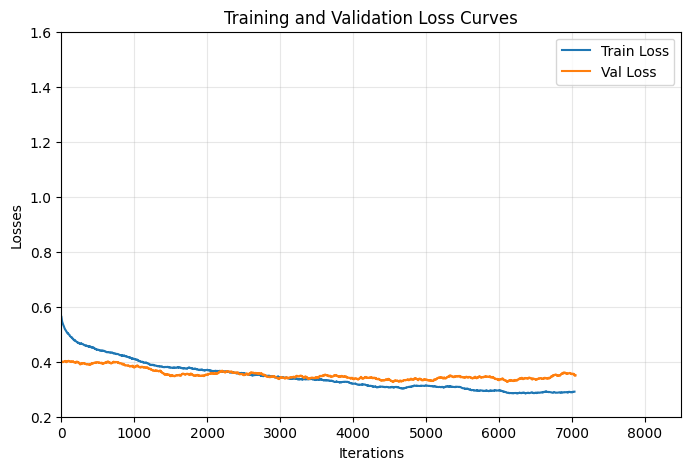

In [ ]:
def plot_loss_graph(loss_list, epoch_nr=None):

    plt.style.use('default')

    plt.figure(figsize=(8, 5))
    plt.xlabel('Iterations')
    plt.ylabel('Losses')
    lengths = [len(x) for x in loss_list]
    max_length = max(lengths)
    relative_len = np.round(max_length / np.array(lengths))

    for i, j, loss in zip(lengths, relative_len, loss_list):
        if epoch_nr:
            filter_size = i // (2 * epoch_nr)
        else:
            filter_size = i // gcd(*lengths)
        moving_average_filter = [1 / filter_size] * filter_size
        loss = np.convolve(loss, moving_average_filter, 'valid')
        plt.plot(np.repeat(loss, int(max_length / len(loss))))

    plt.xlim(0, 8500)
    plt.ylim(0.2, 1.6)

    plt.legend(['Train Loss', 'Val Loss'])
    plt.title('Training and Validation Loss Curves')
    plt.grid(True, alpha=0.3)
    plt.show()

plot_loss_graph([train_loss_list, val_loss_list], epoch_nr=epoch_nr)

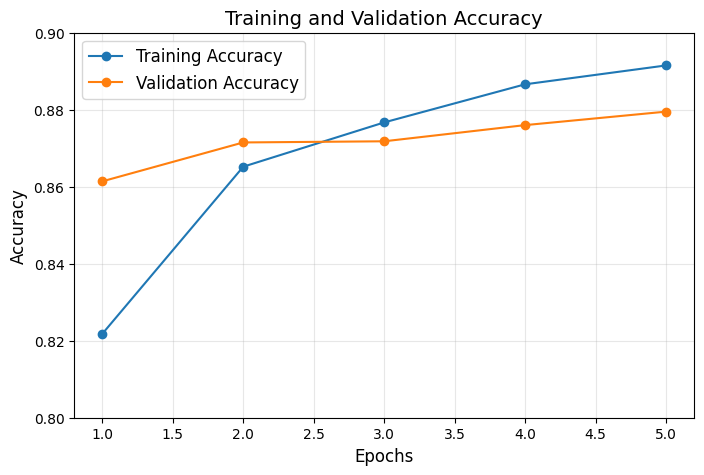

In [ ]:
epoch_nr = 5
train_acc_list = [82.18, 86.52, 87.67, 88.66, 89.15]  # Training accuracy values from output
val_acc_list = [86.14, 87.15, 87.18, 87.60, 87.95]    # Validation accuracy values from output

# Plot accuracy graph with percentage labels and adjusted y-axis limits
plt.figure(figsize=(8, 5))
plt.plot(range(1, epoch_nr + 1), [acc / 100 for acc in train_acc_list], label='Training Accuracy', marker='o', linestyle='-', linewidth=1.5)
plt.plot(range(1, epoch_nr + 1), [acc / 100 for acc in val_acc_list], label='Validation Accuracy', marker='o', linestyle='-', linewidth=1.5)

plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Training and Validation Accuracy', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

# Adjust y-axis
plt.ylim(0.80, 0.90)
plt.show()

Using the validate and accuracy functions, determine the accuracy on the test set. Then, print out an sklearn classification report along with the confusion matrix. Answer the following:

**1) Which classes are identified well?**

**2) Which pair of classes are confused the most?**

In [ ]:
test_losses, test_preds, test_actuals = validate(test_dataloader, three_layer_net, loss_function)
test_accuracy = accuracy(test_preds, test_actuals)

print(f"\nTest Accuracy: {test_accuracy:.4f}")


Test Accuracy: 0.8750


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
class_labels = list(labs.values())
print("\n", classification_report(test_actuals, test_preds, target_names=class_labels))


               precision    recall  f1-score   support

 T-shirt/top       0.89      0.73      0.80      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.77      0.80      0.79      1000
       Dress       0.81      0.92      0.86      1000
        Coat       0.81      0.79      0.80      1000
      Sandal       0.97      0.96      0.97      1000
       Shirt       0.67      0.72      0.69      1000
     Sneaker       0.95      0.94      0.95      1000
         Bag       0.97      0.97      0.97      1000
  Ankle boot       0.94      0.97      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



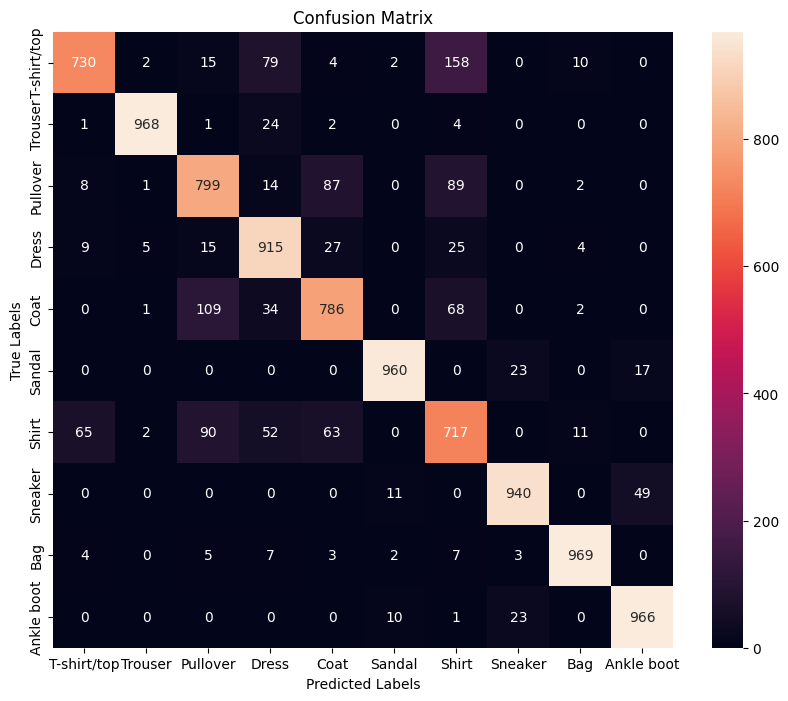

In [ ]:
import seaborn as sns
conf_matrix = confusion_matrix(test_actuals, test_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='rocket', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

**1) Which classes are identified well?**

**2) Which pair of classes are confused the most?**

Firstly, let's answer those two questions.

The accuracy almost 0.88 and weighted averages indicate a generally strong performance across most classes, with challenges primarily between visually or functionally similar clothing items (e.g., T-shirt vs. Shirt, Pullover vs. Coat).

Based on the precision, recall, and F1-score, trouser has the highest performance with precision = 0.99, recall = 0.97, and F1-score = 0.98. This indicates very accurate predictions with few false positives or false negatives.
Then, ankle boot has high performance with precision = 0.94, recall = 0.97, and F1-score = 0.95. Then Sandal has an accurate predictions with precision = 0.97, recall = 0.96, and F1-score = 0.97.Lastly, Bag has Similar to sandal, this class is also well-identified with high scores in all metrics (precision, recall, F1-score around 0.97).

By looking at the confusion matrix, There is significant confusion in T-shirt/top vs. Shirt. For example, 158 instances of "Shirt" are predicted as "T-shirt/top," and 65 instances of "T-shirt/top" are predicted as "Shirt." This is expected because these two classes may share similar visual features, leading to a high rate of misclassification. Moreover, Pullover vs. Coat is another common  confusion, where 87 instances of "Pullover" are predicted as "Coat," and 109 instances of "Coat" are predicted as "Pullover." This could be due to overlapping characteristics between these clothing items. Lastly, Shirt vs. Pullover relationship show us that 90 instances of "Shirt" are predicted as "Pullover," showing a significant level of confusion.




# Part 3: Experimentation (30 pts)

**For this part I just show the visualizing activation and general comment for all hyperparameters. But, you can see the more detailed explanations in the other notebooks**.

## 1) Visualizing activations

Take the weights of the three layer network and plot them such that overall activation for each class is visible in separate 28x28 grids. (Hint: Instead of activations flowing forward, think about it from a backwards manner. Matrix multiplication is a must at this step.) Comment on what shapes activations form and whether ther are similarities / differences.

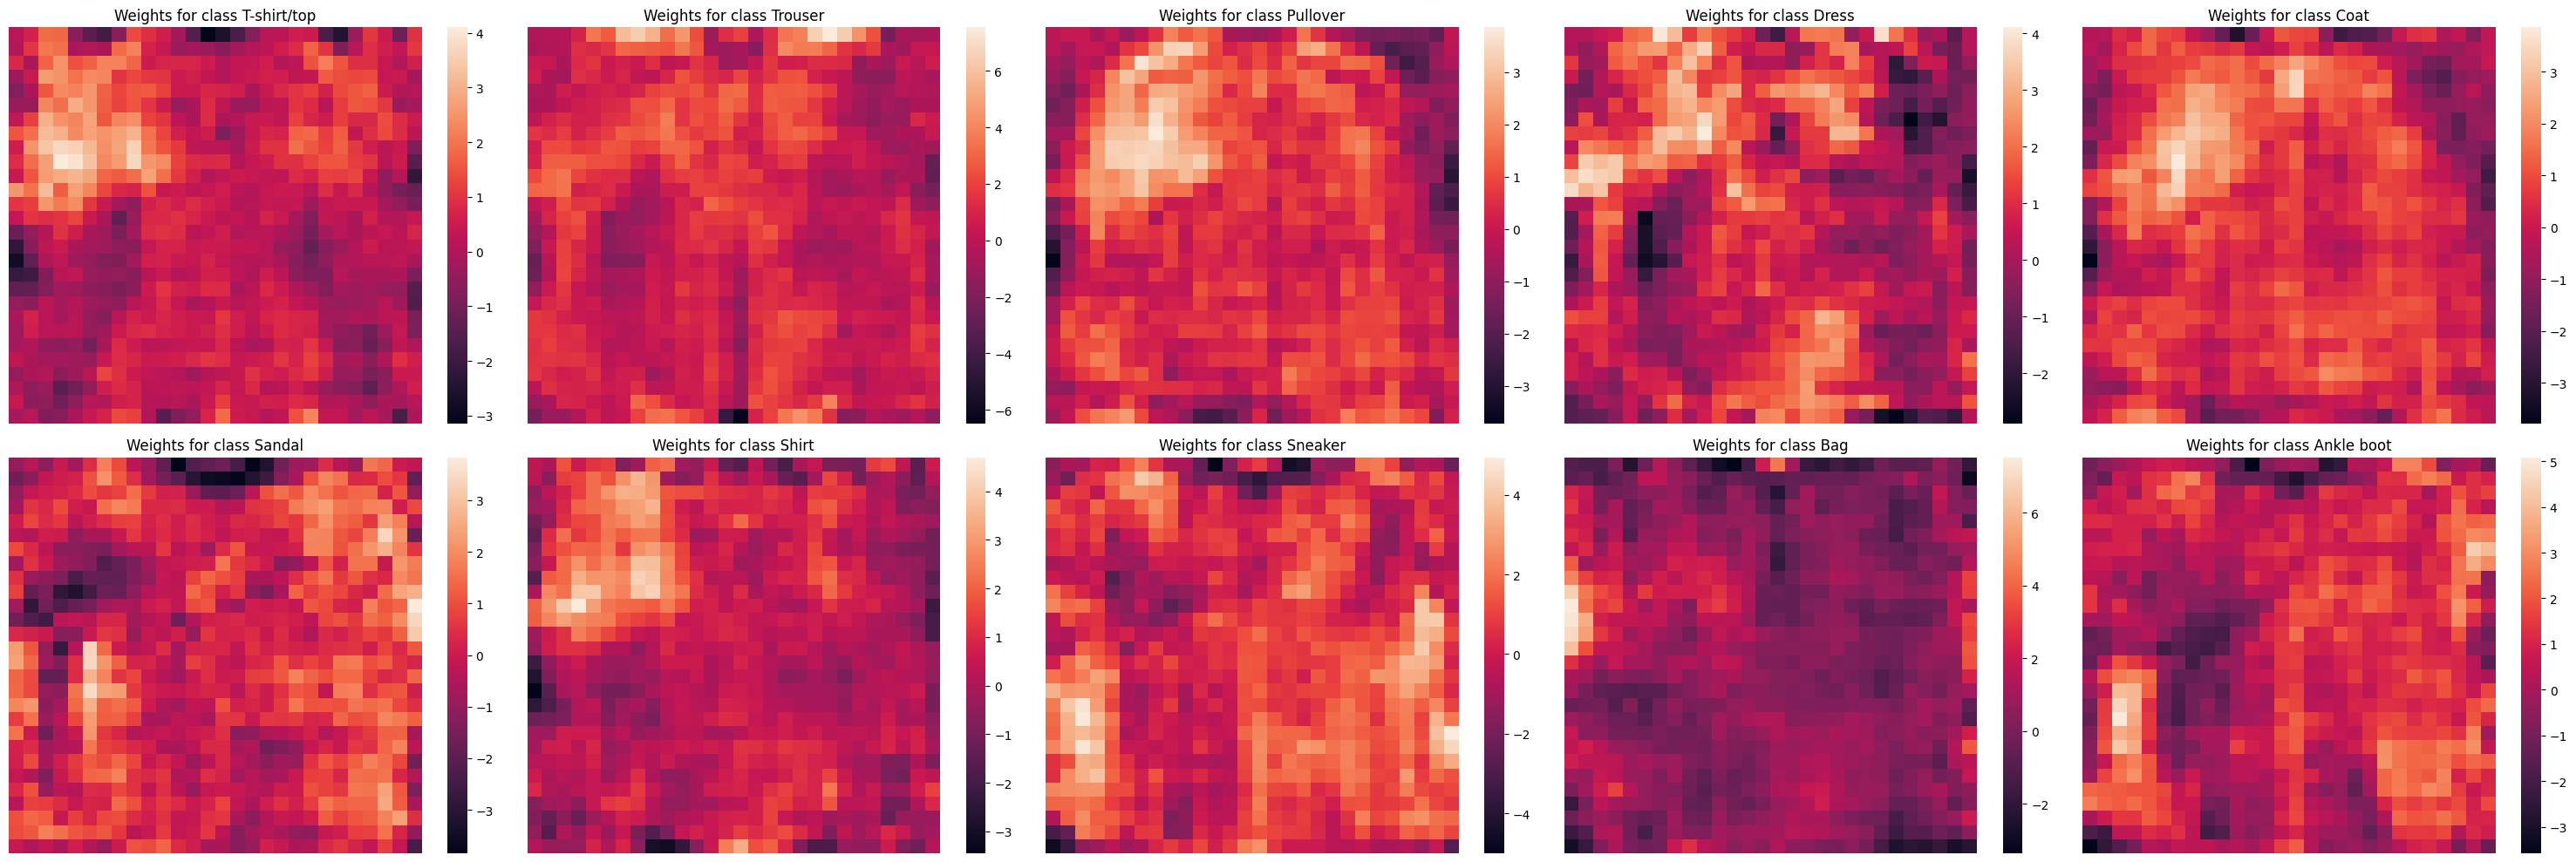

In [ ]:
parameters = []

for param in three_layer_net.parameters():
    parameters.append(param)

input_weights = parameters[0].cpu().detach().numpy()  # (500, 784) - input weights
output_weights = parameters[2].cpu().detach().numpy()  # (10, 500) - output weights

# per class 28x28 grid
class_weights = (output_weights @ input_weights).reshape(10, 28, 28)  # matrix calculation and reshape

# Visualization
fig, ax = plt.subplots(2, 5, figsize=(30, 10))
for i, j in enumerate(ax.flatten()):
    sns.heatmap(class_weights[i, :, :], ax=j, cmap='rocket', cbar=True)
    j.set(xticklabels=[], yticklabels=[], ylabel=None, xlabel=None, title=f'Weights for class {labs.get(i)}')
    j.tick_params(left=False, bottom=False)
plt.tight_layout()
plt.show()


The output represents the weight activations for each class in the Fashion-MNIST dataset. Each heatmap corresponds to a specific class (e.g., T-shirt/top, Trouser, etc.), showing how the model's weights are distributed across the 28x28 input space for that class. Brighter areas indicate higher weight values, which suggest that the model finds those regions more important for identifying the respective class, while darker areas represent lower weight contributions. From these heatmaps, we observe that certain patterns emerge uniquely for each class. For instance, weights for "Trouser" and "Ankle Boot" have distinct activations concentrated in specific regions, likely corresponding to the vertical and rectangular shapes of these items. On the other hand, more ambiguous classes like "Shirt" or "Coat" have more dispersed and overlapping activations, reflecting the model's greater difficulty in distinguishing these categories.

## 2) Different hyperparameters

Try two different values for each of the following hyperparameters (one at a time) and observe the loss graph, final accuracy and weight activations:

* Hidden layer dimension
* Learning rate
* Batch size
* Criterion
* Optimizer

**Explain what effect each change had on the model's ability to learn. Refer to obtained results.**

**Experiments should be run on a separate .ipynb file, and the findings can be explained there.**


*In here you can see the new model definition and general interpretation, all others experiments and also detailed explanations for each hyperparameter techniques includes another .ipynb file:*

In [ ]:
# New model definition
class ThreeLayerNetwork(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.layer1 = torch.nn.Linear(input_dim, hidden_dim)
        self.layer2 = torch.nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = F.relu(self.layer1(x))
        x = self.layer2(x)
        return x

# Change hyperparameter
def run_experiment(hidden_dim=500, learning_rate=0.001, batch_size=32, optimizer_type='adam', criterion_type='cross_entropy'):
    # Define a model
    model = ThreeLayerNetwork(28 * 28, hidden_dim, 10).to(device)

    # Criterion
    if criterion_type == 'cross_entropy':
        criterion = torch.nn.CrossEntropyLoss()
    elif criterion_type == 'mse':
        criterion = torch.nn.MSELoss()
    else:
        raise ValueError("Unsupported criterion type")

    # Optimizer
    if optimizer_type == 'adam':
        optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    elif optimizer_type == 'sgd':
        optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    elif optimizer_type == 'rmsprop':
        optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)
    else:
        raise ValueError("Unsupported optimizer type")

    # DataLoader
    train_dataloader = DataLoader(fmnist_train, batch_size=batch_size, shuffle=True)
    valid_dataloader = DataLoader(fmnist_val, batch_size=batch_size, shuffle=False)

    # Training
    for epoch in range(5):  # 5 epoch
        train_loss, train_acc = train(train_dataloader, model, criterion, optimizer)
        val_loss, val_preds, val_actuals = validate(valid_dataloader, model, criterion)
        val_acc = accuracy(val_preds, val_actuals)

        print(f"Epoch {epoch+1} - Train Loss: {np.mean(train_loss):.4f}, Val Loss: {np.mean(val_loss):.4f}, "
              f"Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")


This interpretations also include for the second part, but I want to just attach there as well.

We can make some general interpretations for general Analysis of hyperparameter adjustments. Throughout the experiments, we adjusted five key hyperparameters—hidden layer dimension, learning rate, batch size, criterion, and optimizer—and observed their effects on the model's performance in terms of training/validation loss, accuracy, and overall convergence behavior.

For the hidden layer, increasing the hidden layer size from 200 to 1000 showed improved training accuracy and smoother loss curves. While larger dimensions provided slightly better accuracy, the improvements plateaued after a certain point, reflecting diminishing returns. Larger dimensions also increased computational cost, highlighting a trade-off between performance and efficiency.

For the learning rate, I tested 0.01 and 0.0001. The higher learning rate led to faster convergence but introduced instability in the loss curves, while the lower learning rate provided stable and gradual learning with comparable accuracy. This highlights the need for a balanced learning rate to optimize convergence speed and stability.

For the Batch size, smaller batch sizes (16) resulted in noisier loss curves but marginally better generalization as evidenced by higher validation accuracy. Larger batch sizes (128) produced smoother loss curves and were computationally efficient but showed a slight reduction in generalization. This trade-off aligns with the theoretical advantages of small vs. large batch training.

Let's talk about the criterion (Loss Function). CrossEntropyLoss outperformed MSELoss for this classification task, as expected. CrossEntropyLoss minimized loss more effectively and provided smoother training. MSELoss, while achieving similar accuracy, introduced noise and was less efficient due to its unsuitability for classification.

Lastly, for the Optimizer part, Adam showed faster convergence and smoother loss curves compared to SGD. While both optimizers achieved comparable validation accuracy, Adam's adaptive learning rate mechanism enabled better performance with minimal tuning. SGD, on the other hand, required more iterations to stabilize and may benefit from further hyperparameter tuning.

In conclusion;
The experiments demonstrated the significant impact of hyperparameter selection on model performance. Balancing learning rate and batch size is crucial for efficient and stable training. CrossEntropyLoss and Adam optimizer are well-suited for classification tasks like Fashion-MNIST in this homework.

# Part 4: Convolutional neural networks (25 pts)

## 1) Model Definition

Construct a convolutional neural network with the following parameters and design considerations:

* Two convolutional layers with 32 and 64 learnable kernels of size 3x3
* Each convolution is followed by max pooling with a kernel of size 2x2
* Two fully connected layers, one projecting the output of the last conv layer to a 128 dimensional space, and another one giving 10 logits for each class.
* Initialize the parameters of conv layers and linear layers with **Xavier uniform** distribution.
* Each layer output is sent to the ReLU activation function.

Again, make sure the output shape is (batch size x number of classes) by generating predictions on a sample batch.

In [ ]:
import torch
import torch.nn as nn

class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()

        # Define convolutional layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)

        # Define fully connected layers
        self.fc1 = nn.Linear(in_features=64 * 7 * 7, out_features=128)
        self.fc2 = nn.Linear(in_features=128, out_features=10)

        # Initialize weights
        self.apply(self._init_weights_)

    def _init_weights_(self, m):
        if isinstance(m, nn.Linear):
            nn.init.xavier_uniform_(m.weight)
            m.bias.data.fill_(0.01)
        if isinstance(m, nn.Conv2d):
            nn.init.xavier_uniform_(m.weight)

    def forward(self, x):
        # Convolutional layers with ReLU and Max Pooling
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, kernel_size=2, stride=2)
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, kernel_size=2, stride=2)

        # Flatten the tensor
        x = x.view(x.size(0), -1)

        # Fully connected layers with ReLU
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)

        return x

# Instantiate the model and test with dummy input
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
convnet = ConvolutionalNetwork().to(device)

# Test the model with dummy input
dummy_input = torch.randn(16, 1, 28, 28).to(device)
dummy_output = convnet(dummy_input)

print(f"Dummy input shape: {dummy_input.shape}")
print(f"Dummy output shape: {dummy_output.shape}")


Dummy input shape: torch.Size([16, 1, 28, 28])
Dummy output shape: torch.Size([16, 10])


## 2) Training and evaluation

In a similar vein, define another Adam optimizer with learning rate 0.001. This time, prepare a training loop of 10 epochs. Make sure to record the loss and accuracy values for the training and validation set.

Then test the model performance in a similar vein to the first model. Compare the model performance:

**Where does the CNN model improve over the FCN model? Which classes are identified better, or worse?**

In [ ]:
import torch
from tqdm import tqdm

# Define the optimizer and loss function
optimizer = torch.optim.Adam(convnet.parameters(), lr=0.001)
criterion = torch.nn.CrossEntropyLoss()

epoch_nr = 10
train_losses, valid_losses = [], []
train_accuracies, valid_accuracies = [], []

# Training and evaluation loop
for epoch in range(epoch_nr):
    # Training phase
    convnet.train()
    running_loss, correct, total = 0.0, 0, 0

    for inputs, labels in tqdm(train_dataloader, desc=f"Epoch {epoch + 1} Training"):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = convnet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_dataloader)
    train_acc = 100 * correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    # Validation phase
    convnet.eval()
    running_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for inputs, labels in tqdm(valid_dataloader, desc=f"Epoch {epoch + 1} Validation"):
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = convnet(inputs)
            loss = criterion(outputs, labels)

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    valid_loss = running_loss / len(valid_dataloader)
    valid_acc = 100 * correct / total
    valid_losses.append(valid_loss)
    valid_accuracies.append(valid_acc)

    # Print epoch summary
    print(f"End of epoch {epoch + 1} : Train loss: {train_loss:.3f} \t "
          f"Valid loss: {valid_loss:.3f} \t Train Acc: {train_acc:.2f}% \t Valid Acc: {valid_acc:.2f}%")


Epoch 1 Validation: 100%|██████████| 313/313 [00:02<00:00, 134.91it/s]


End of epoch 1 : Train loss: 0.449 	 Valid loss: 0.342 	 Train Acc: 83.80% 	 Valid Acc: 87.34%


Epoch 2 Validation: 100%|██████████| 313/313 [00:02<00:00, 134.53it/s]


End of epoch 2 : Train loss: 0.292 	 Valid loss: 0.284 	 Train Acc: 89.47% 	 Valid Acc: 89.52%


Epoch 3 Validation: 100%|██████████| 313/313 [00:02<00:00, 133.43it/s]


End of epoch 3 : Train loss: 0.246 	 Valid loss: 0.248 	 Train Acc: 91.03% 	 Valid Acc: 90.90%


Epoch 4 Validation: 100%|██████████| 313/313 [00:02<00:00, 137.69it/s]


End of epoch 4 : Train loss: 0.215 	 Valid loss: 0.268 	 Train Acc: 92.06% 	 Valid Acc: 90.12%


Epoch 5 Validation: 100%|██████████| 313/313 [00:02<00:00, 137.20it/s]


End of epoch 5 : Train loss: 0.188 	 Valid loss: 0.226 	 Train Acc: 93.04% 	 Valid Acc: 91.94%


Epoch 6 Validation: 100%|██████████| 313/313 [00:02<00:00, 137.34it/s]


End of epoch 6 : Train loss: 0.166 	 Valid loss: 0.247 	 Train Acc: 93.94% 	 Valid Acc: 91.07%


Epoch 7 Validation: 100%|██████████| 313/313 [00:02<00:00, 136.06it/s]


End of epoch 7 : Train loss: 0.145 	 Valid loss: 0.218 	 Train Acc: 94.68% 	 Valid Acc: 92.46%


Epoch 8 Validation: 100%|██████████| 313/313 [00:02<00:00, 132.16it/s]


End of epoch 8 : Train loss: 0.127 	 Valid loss: 0.225 	 Train Acc: 95.19% 	 Valid Acc: 92.15%


Epoch 9 Validation: 100%|██████████| 313/313 [00:02<00:00, 137.01it/s]


End of epoch 9 : Train loss: 0.110 	 Valid loss: 0.256 	 Train Acc: 95.92% 	 Valid Acc: 91.66%


Epoch 10 Validation: 100%|██████████| 313/313 [00:02<00:00, 133.39it/s]

End of epoch 10 : Train loss: 0.094 	 Valid loss: 0.270 	 Train Acc: 96.45% 	 Valid Acc: 92.09%


In [ ]:
# Evaluate the model on the test set
convnet.eval()
correct, total = 0, 0

with torch.no_grad():
    for inputs, labels in tqdm(test_dataloader, desc="Testing"):
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = convnet(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = correct / total
print(f"\n Test Accuracy: {test_accuracy:.4f}")


Testing: 100%|██████████| 313/313 [00:02<00:00, 133.76it/s]


 Test Accuracy: 0.9186


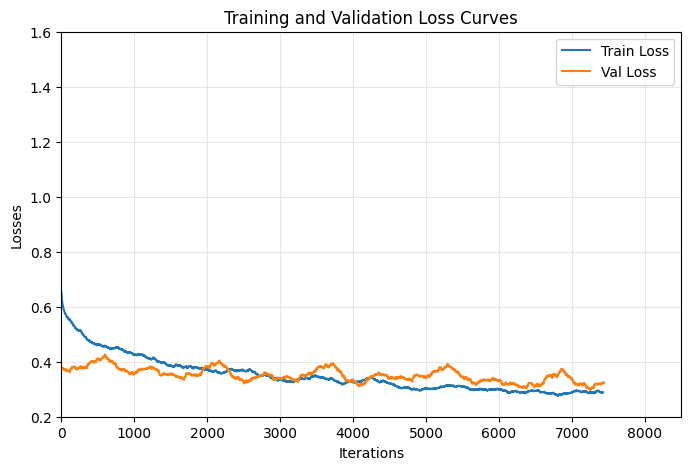

In [ ]:
def plot_loss_graph(loss_list, epoch_nr=None):
    plt.style.use('default')

    plt.figure(figsize=(8, 5))
    plt.xlabel('Iterations')
    plt.ylabel('Losses')
    lengths = [len(x) for x in loss_list]
    max_length = max(lengths)
    relative_len = np.round(max_length / np.array(lengths))

    for i, j, loss in zip(lengths, relative_len, loss_list):
        if epoch_nr:
            filter_size = i // (2 * epoch_nr)
        else:
            filter_size = i // gcd(*lengths)
        moving_average_filter = [1 / filter_size] * filter_size
        loss = np.convolve(loss, moving_average_filter, 'valid')
        plt.plot(np.repeat(loss, int(max_length / len(loss))))


    plt.xlim(0, 8500)
    plt.ylim(0.2, 1.6)

    plt.legend(['Train Loss', 'Val Loss'])
    plt.title('Training and Validation Loss Curves')
    plt.grid(True, alpha=0.3)
    plt.show()

plot_loss_graph([train_loss_list, val_loss_list], epoch_nr=epoch_nr)

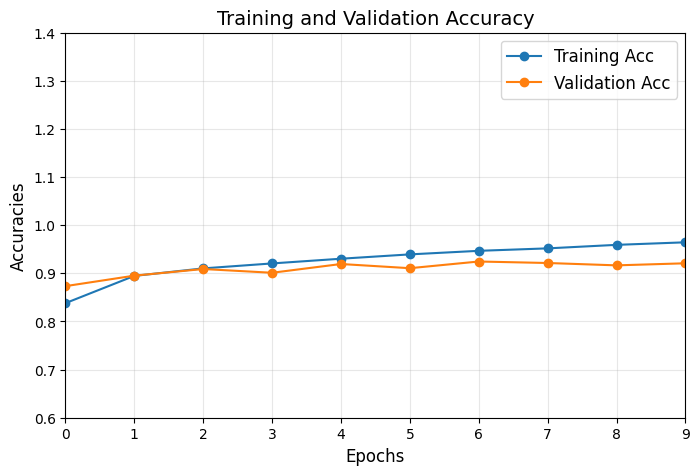

In [ ]:
epoch_nr = len(train_accuracies)

# Adjust the accuracy values to percentages (0-1 scale)
train_accuracies_percentage = [acc / 100 for acc in train_accuracies]
valid_accuracies_percentage = [acc / 100 for acc in valid_accuracies]

# Function to plot accuracy graph
def plot_accuracy_graph(train_accuracies, valid_accuracies, epoch_nr):
    plt.style.use('default')
    plt.figure(figsize=(8, 5))
    plt.plot(range(epoch_nr), train_accuracies, label='Training Acc', marker='o', linestyle='-', linewidth=1.5)
    plt.plot(range(epoch_nr), valid_accuracies, label='Validation Acc', marker='o', linestyle='-', linewidth=1.5)

    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Accuracies', fontsize=12)
    plt.title('Training and Validation Accuracy', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(alpha=0.3)
    plt.xlim(0, epoch_nr - 1)
    plt.ylim(0.60, 1.4)  # Set y-limit as specified
    plt.show()

# Plot
plot_accuracy_graph(train_accuracies_percentage, valid_accuracies_percentage, epoch_nr)


Testing: 100%|██████████| 313/313 [00:02<00:00, 132.74it/s]


<Figure size 1000x1000 with 0 Axes>

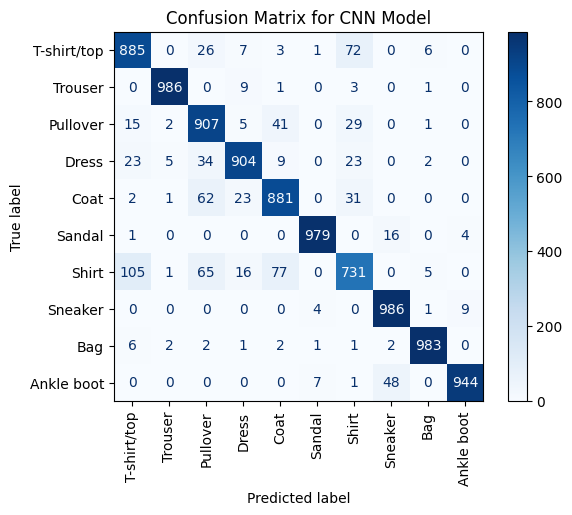

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_true = []
y_pred = []

convnet.eval()
with torch.no_grad():
    for inputs, labels in tqdm(test_dataloader, desc="Testing"):
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = convnet(inputs)
        _, predicted = torch.max(outputs, 1)

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[labs[i] for i in range(10)])

# Confusion matrix visualization
plt.figure(figsize=(10, 10))
disp.plot(cmap=plt.cm.Blues, xticks_rotation="vertical", values_format="d")
plt.title("Confusion Matrix for CNN Model")
plt.show()


The comparison between the CNN and FNN models highlights that CNN significantly outperforms FNN in both training and validation accuracy, achieving 96.45% and 92.09% respectively by the 10th epoch, compared to FNN's 89.15% and 87.95% by the 5th epoch. CNN also demonstrates a lower validation loss (0.270 vs. 0.325), indicating better generalization. Moreover, for the second question, the comparison between the confusion matrices of CNN and FNN reveals that CNN significantly outperforms FNN in nearly all classes. CNN demonstrates better accuracy and reduced misclassification, especially in challenging pairs like "Pullover vs. Coat" and "T-shirt/top vs. Shirt." For example, the CNN model handles the "Shirt" class much better than FNN, where FNN exhibits frequent misclassifications. Additionally, CNN performs almost flawlessly in classes like "Sneaker," "Ankle Boot," and "Bag," achieving near-perfect predictions, whereas FNN struggles more with these. Both models show some confusion between "T-shirt/top" and "Shirt," as well as "Pullover" and "Coat," but CNN manages to mitigate these issues more effectively. The advantage of CNN lies in its ability to learn spatial features, such as edges and textures, which FNN lacks due to its flattened input structure. Overall, CNN's architecture provides a significant performance edge in distinguishing visually similar classes.

# Part 5: Real life tests (10 pts.)

Download 5 images of clothing items represented in our dataset. **While selecting, please focus on classes that were confused.** Provide the images as links/files. Do not use images from the MNIST dataset.

Process them such that their shapes and value ranges
matches the training set examples. (If your images have a bright background, you might have to take the negative of the image, as our samples have dark backgrounds.)

Generate predictions for the images using the trained CNN and display it in terms of percentages with the help of softmax. **Were the classes predicted accurately, and with high confidence? Speculate on why certain examples were difficult for the model.**

Remember for the part 1,  most confused classes are T-shirt/top vs. Shirt. Moreover, Pullover vs. Coat is another common  confusion, where 87 instances of "Pullover" ". Lastly, Shirt vs. Pullover. So let's download 5 images shirt, t-shirt, pullover, coat and trousers.

Note: You can find the 5 different images in the uploaded file.

Image 1:
Prediction Class: Shirt
Probabilities: [4.9656131e-03 9.0378954e-10 2.6109735e-02 7.3316091e-06 3.2744855e-02
 1.9512529e-09 9.3617207e-01 2.1215756e-08 1.6917265e-07 2.2807477e-07]
Highest Probabilities: Shirt (93.62%)


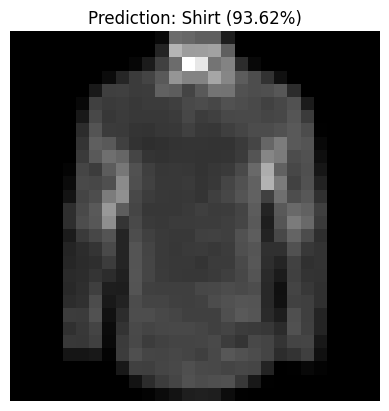

Image 2:
Prediction Class: Shirt
Probabilities: [3.3972103e-02 1.3026762e-12 5.2529863e-06 1.6507217e-04 1.3714832e-03
 1.5534619e-05 6.1279577e-01 2.5075259e-10 3.5167474e-01 5.0252087e-08]
Highest Probabilities: Shirt (61.28%)


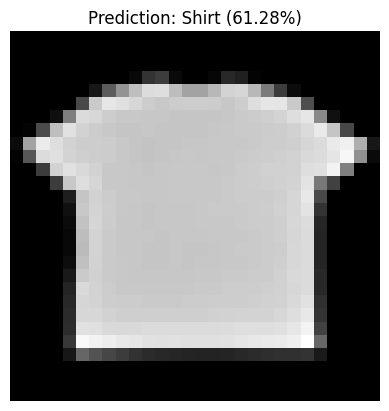

Image 3:
Prediction Class: Coat
Probabilities: [2.0978284e-06 7.2824697e-09 3.2233605e-03 1.0218931e-08 9.9534649e-01
 9.0793351e-10 1.4279541e-03 1.9983197e-09 1.1280380e-09 5.0959272e-08]
Highest Probabilities: Coat (99.53%)


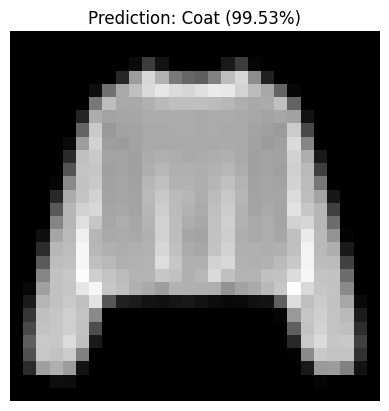

Image 4:
Prediction Class: Coat
Probabilities: [1.73684747e-08 1.21599798e-16 7.69326696e-03 2.36621112e-10
 6.69274926e-01 7.92202838e-13 3.23031813e-01 1.00495264e-17
 4.15833382e-16 1.39415812e-10]
Highest Probabilities: Coat (66.93%)


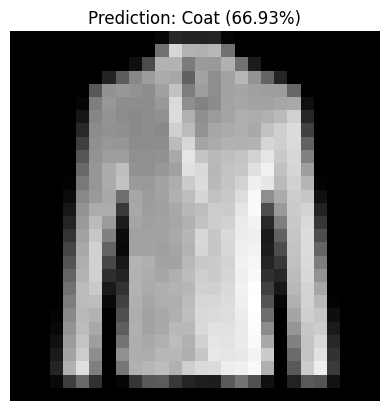

Image 5:
Prediction Class: Trouser
Probabilities: [1.5177007e-11 1.0000000e+00 1.8412288e-12 6.1278004e-11 2.8360812e-15
 1.8796216e-20 1.6943990e-12 1.9699573e-17 2.6433518e-19 2.8784906e-23]
Highest Probabilities: Trouser (100.00%)


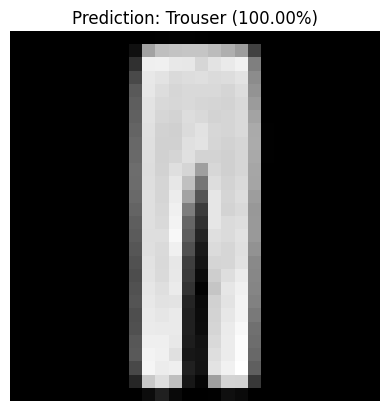

In [ ]:
# colab file that includes 5 different images
image_folder = "/content"


def process_image(image_path):
    from PIL import Image
    import torchvision.transforms as transforms
    img = Image.open(image_path).convert('L')
    img = img.resize((28, 28))
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])
    img_tensor = transform(img)
    # black and white
    img_tensor = 1 - img_tensor
    return img_tensor.unsqueeze(0)  # Batch


images = []
for i in range(1, 6):  # from images1.jpg to images5
    image_path = os.path.join(image_folder, f"images{i}.jpg")
    images.append(process_image(image_path).to(device))

# Use model for prediction
convnet.eval()
for idx, img_tensor in enumerate(images, start=1):
    with torch.no_grad():
        outputs = convnet(img_tensor)
        probs = F.softmax(outputs, dim=1)  #probability distr.
        pred = torch.argmax(probs, dim=1).item()

        print(f"Image {idx}:")
        print(f"Prediction Class: {labs[pred]}")
        print(f"Probabilities: {probs.cpu().numpy()[0]}")
        print(f"Highest Probabilities: {labs[pred]} ({probs[0][pred].item() * 100:.2f}%)")

        img = img_tensor.squeeze().cpu().numpy()
        plt.imshow(img, cmap="gray")
        plt.title(f"Prediction: {labs[pred]} ({probs[0][pred].item() * 100:.2f}%)")
        plt.axis("off")
        plt.show()


As you can see, the model performed well overall (especially we test only 5 images), with three out of five images being predicted correctly and with reasonably high confidence.
However, there was notable variability in confidence levels. Images of "Shirt" and "Coat" showed some confusion due to overlapping features.
Image 2 and Image 3 can predict false. Actually Image 2 is T-shirt but it's really close to Shirt, it's hard one. Moreover, Image 3 belongs to pullover that really seems like a coat but again it's false prediction.
For the Shirt vs. T-Shirt,  both categories share many visual similarities, like neckline shapes and fabric textures.
Moreover, for the Pullover vs. Coat, these classes often have overlapping features, such as similar shapes and textures, especially when observed in grayscale images. We know that, ıf we test more images, our prediction score is going up.

**Mehmet Ali Erkan**
